In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

 

In [2]:
df = pd.read_csv("C:\\Users\\Fahad Siddiqui\\AppData\\Local\\Programs\\Python\\Python310\\Scripts\\archive\\IPL Matches 2008-2020.csv")
df.head()
df.shape

(816, 17)

#### Getting Top most "Player Of the Matches"

In [3]:
df['player_of_match'].value_counts()


AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: player_of_match, Length: 233, dtype: int64

#### **Pick Only the Names of Top 5 "Players of the Matches"** 

In [4]:
list(df['player_of_match'].value_counts().keys()[:5])


['AB de Villiers', 'CH Gayle', 'RG Sharma', 'DA Warner', 'MS Dhoni']

<BarContainer object of 5 artists>

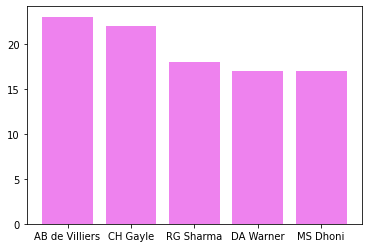

In [5]:
plt.bar(list(df['player_of_match'].value_counts().keys()[0:5]),list(df['player_of_match'].value_counts()[0:5]),color='violet')


In [6]:
df['result'].value_counts()


wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [7]:
df['toss_winner'].value_counts()


Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

#### **Extracting the records where a team won batting first**

In [8]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [9]:
battingFirst = df[df['result'] == 'runs']



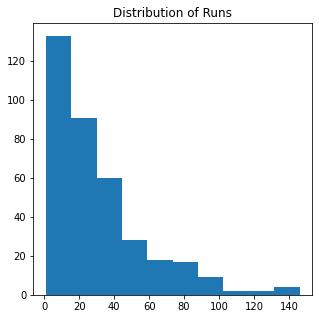

In [10]:
plt.figure(figsize=(5,5))
plt.hist(battingFirst['result_margin'])
plt.title("Distribution of Runs")
plt.show()

#### **Find out the no of wins w.r.t each team with batting First**

In [11]:
df.head(3)


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar


In [12]:
grouping_team = df.groupby('team1')
teams = grouping_team['team1'].value_counts().keys()
a=[]
for i in range(len(grouping_team)):
    a.append(teams[i][0])
print(a)

['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


In [13]:
len(a)


15

In [14]:
len(df['toss_winner'])

816

In [15]:
df['toss_winner'][2]

'Rajasthan Royals'

In [37]:
print(a)


['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


In [46]:
dic = {}
value_team = []

total_batFirst_winner = 0
for i in range(len(a)):
    s = 0
    for j in range(len(df['toss_winner'])):
        if a[i] == df['toss_winner'][j] and df['toss_decision'][j] == 'bat':
            s = s+1
            total_batFirst_winner = total_batFirst_winner + 1
            
    value_team.append(s)
    print(a[i], '               ',s)
    
        
  
for team in a:
    for value in value_team:
        dic[team] = value
        value_team.remove(value)
        break
        
print(dic)    
print(total_batFirst_winner)        



Chennai Super Kings                 51
Deccan Chargers                 24
Delhi Capitals                 7
Delhi Daredevils                 29
Gujarat Lions                 1
Kings XI Punjab                 27
Kochi Tuskers Kerala                 3
Kolkata Knight Riders                 34
Mumbai Indians                 48
Pune Warriors                 11
Rajasthan Royals                 34
Rising Pune Supergiant                 0
Rising Pune Supergiants                 3
Royal Challengers Bangalore                 24
Sunrisers Hyderabad                 24
{'Chennai Super Kings': 51, 'Deccan Chargers': 24, 'Delhi Capitals': 7, 'Delhi Daredevils': 29, 'Gujarat Lions': 1, 'Kings XI Punjab': 27, 'Kochi Tuskers Kerala': 3, 'Kolkata Knight Riders': 34, 'Mumbai Indians': 48, 'Pune Warriors': 11, 'Rajasthan Royals': 34, 'Rising Pune Supergiant': 0, 'Rising Pune Supergiants': 3, 'Royal Challengers Bangalore': 24, 'Sunrisers Hyderabad': 24}
320


In [20]:
df.shape

(816, 17)

In [48]:
percentage = (total_batFirst_winner/816) * 100
print(round(percentage,2))

39.22


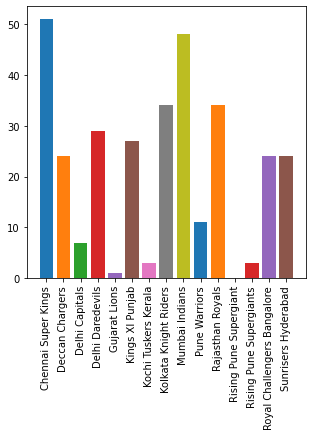

In [66]:
plt.figure(figsize=(5,5))
plt.bar(dic.keys(),dic.values(),color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22' ])
plt.xticks(rotation = 'vertical')
plt.show()

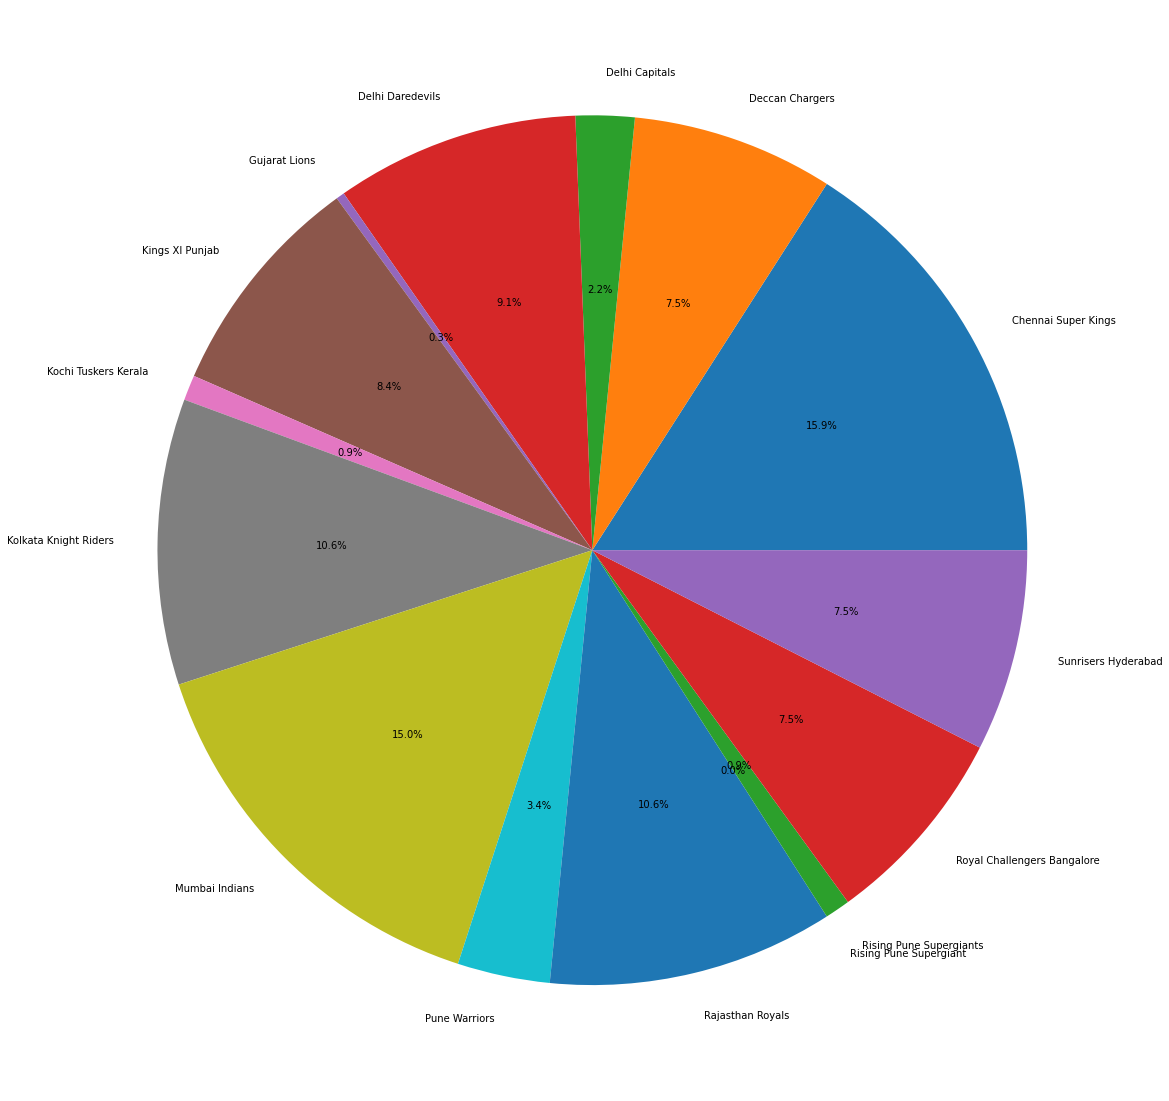

In [70]:
plt.figure(figsize=(20,20))
plt.pie(dic.values(),labels=dic.keys(),autopct='%0.1f%%')
plt.show()

In [75]:
battingSecond = df[df['result'] == 'runs']



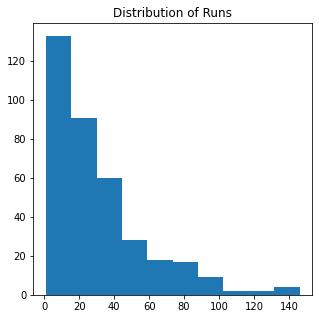

In [76]:
plt.figure(figsize=(5,5))
plt.hist(battingSecond['result_margin'])
plt.title("Distribution of Runs")
plt.show()

In [71]:
dic = {}
value_team = []

total_batSecond_winner = 0
for i in range(len(a)):
    s = 0
    for j in range(len(df['toss_winner'])):
        if a[i] == df['toss_winner'][j] and df['toss_decision'][j] == 'field':
            s = s+1
            total_SecondFirst_winner = total_batSecond_winner + 1
            
    value_team.append(s)
    print(a[i], '               ',s)
    
        
  
for team in a:
    for value in value_team:
        dic[team] = value
        value_team.remove(value)
        break
        
print(dic)    
print(total_batFirst_winner)        



Chennai Super Kings                 46
Deccan Chargers                 19
Delhi Capitals                 13
Delhi Daredevils                 51
Gujarat Lions                 14
Kings XI Punjab                 58
Kochi Tuskers Kerala                 5
Kolkata Knight Riders                 64
Mumbai Indians                 58
Pune Warriors                 9
Rajasthan Royals                 53
Rising Pune Supergiant                 6
Rising Pune Supergiants                 4
Royal Challengers Bangalore                 63
Sunrisers Hyderabad                 33
{'Chennai Super Kings': 46, 'Deccan Chargers': 19, 'Delhi Capitals': 13, 'Delhi Daredevils': 51, 'Gujarat Lions': 14, 'Kings XI Punjab': 58, 'Kochi Tuskers Kerala': 5, 'Kolkata Knight Riders': 64, 'Mumbai Indians': 58, 'Pune Warriors': 9, 'Rajasthan Royals': 53, 'Rising Pune Supergiant': 6, 'Rising Pune Supergiants': 4, 'Royal Challengers Bangalore': 63, 'Sunrisers Hyderabad': 33}
320


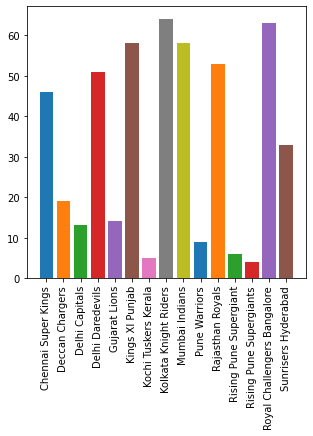

In [72]:
plt.figure(figsize=(5,5))
plt.bar(dic.keys(),dic.values(),color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22' ])
plt.xticks(rotation = 'vertical')
plt.show()

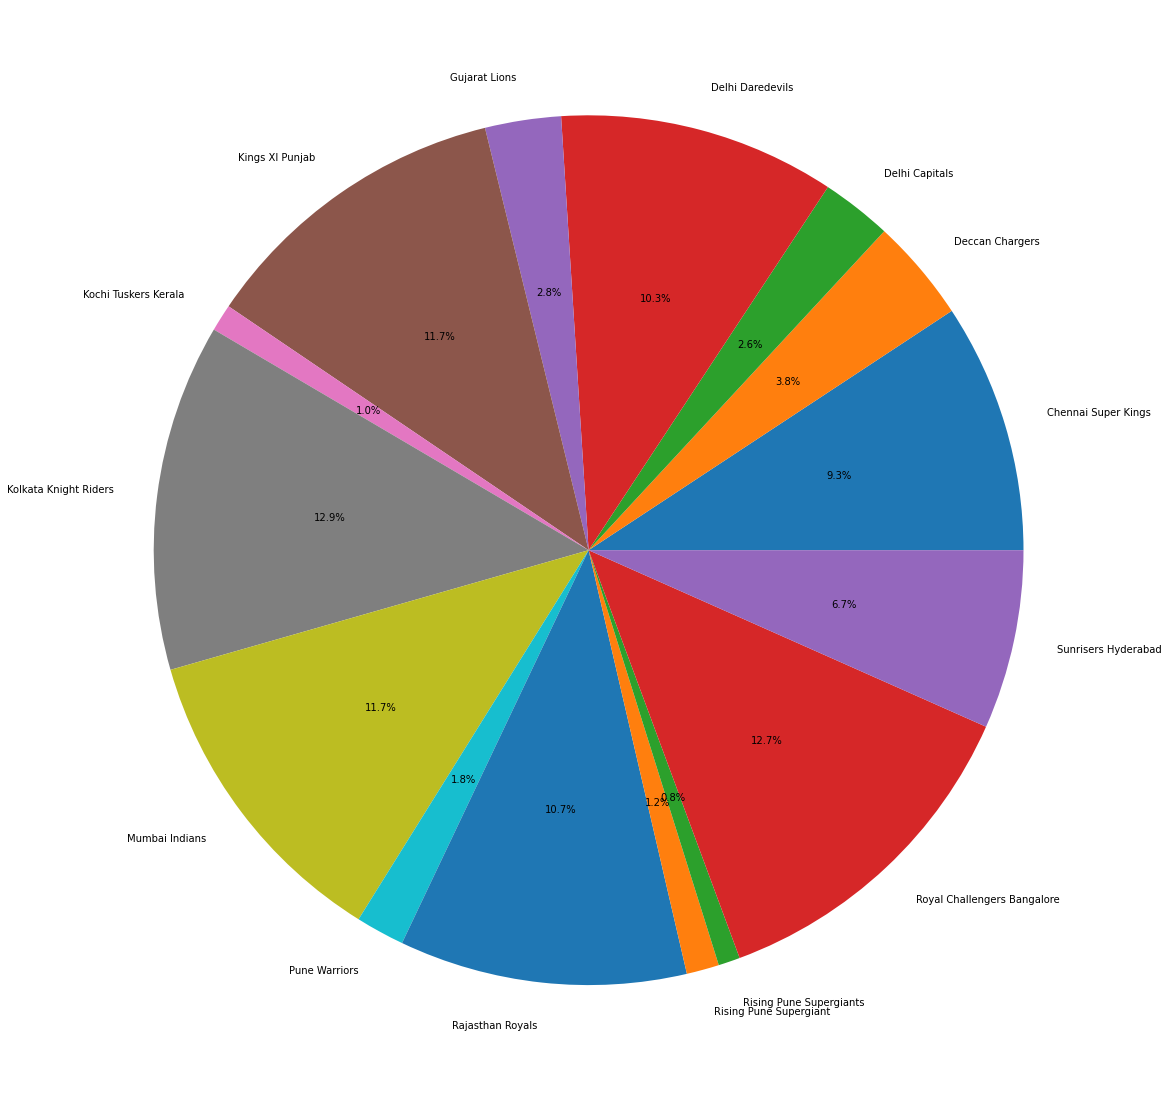

In [73]:
plt.figure(figsize=(20,20))
plt.pie(dic.values(),labels=dic.keys(),autopct='%0.1f%%')
plt.show()

#### find out how many times a team wins a match after wins a toss

In [79]:
df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          65
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Bengaluru          15
Durban             15
Visakhapatnam      13
Ahmedabad          12
Sharjah            12
Centurion          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Cape Town           7
Port Elizabeth      7
Ranchi              7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [82]:
df['city'].value_counts().sum()

803

In [80]:
np.sum(df['toss_winner'] == df['winner'])

418

In [84]:
(418/803)*100

52.054794520547944